In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Inputting cleaned data

try:
    df = pd.read_csv('preprocessed_city_day.csv')
    print("--- File 'preprocessed_city_day.csv' loaded. ---")
except FileNotFoundError:
    print("Error: 'preprocessed_city_day.csv' not found. Make sure it's in the same folder.")
    exit()

--- File 'preprocessed_city_day.csv' loaded. ---


In [ ]:
# Train - Test Split

split_year = 2018 # Since this is a time-series data we cannot split randomly by picking samples

# We'll train on all data up to and including 2018.
# We'll test on all data from 2019 and 2020.

print(f"Splitting data: Training on years <= {split_year}, Testing on years > {split_year}")

# Create the training and testing dataframes
train_df = df[df['year'] <= split_year]
test_df = df[df['year'] > split_year]

# Separate Features (X) and Target (y)
target_column = 'AQI'

# Create X_train and y_train
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

# Create X_test and y_test
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

print("\n--- Data successfully split into 4 sets ---")
print(f"Shape of X_train (features): {X_train.shape}")
print(f"Shape of y_train (target):   {y_train.shape}")
print(f"Shape of X_test (features):  {X_test.shape}")
print(f"Shape of y_test (target):    {y_test.shape}")

# Save the 4 new DataFrames to CSVs
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\n--- All 4 files have been saved: ---")
print("1. X_train.csv (Training features)")
print("2. y_train.csv (Training target)")
print("3. X_test.csv (Testing features)")
print("4. y_test.csv (Testing target)")

Splitting data: Training on years <= 2018, Testing on years > 2018

--- Data successfully split into 4 sets ---
Shape of X_train (features): (9874, 29)
Shape of y_train (target):   (9874,)
Shape of X_test (features):  (7495, 29)
Shape of y_test (target):    (7495,)

--- All 4 files have been saved: ---
1. X_train.csv (Training features)
2. y_train.csv (Training target)
3. X_test.csv (Testing features)
4. y_test.csv (Testing target)


In [ ]:
# Training the model

# For predicting AQI, we will use two really powerful Regression models. RandomForestRegressor and XGBoost. We will see which is better.

# 1. Train and Evaluate Random Forest Regressor
print("\nTraining Random Forest Model... (This may take a moment)")
start_time = time.time()

# Initialize the model
# n_jobs=-1 uses all your computer's cores to speed up training
# random_state=42 ensures you get the same results every time you run it
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)

end_time = time.time()
print(f"Random Forest training complete in {end_time - start_time:.2f} seconds.")

# Calculate and print the R-squared score
rf_r2 = r2_score(y_test, rf_preds)
print(f"--- Random Forest R-squared (R²) Score: {rf_r2:.4f} ---")


# 2. Train and Evaluate XGBoost Regressor
print("\nTraining XGBoost Model... (This may also take a moment)")
start_time = time.time()

# Initialize the model
# n_estimators=100 is a good starting point
# random_state=42 ensures reproducibility
xgb_model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_preds = xgb_model.predict(X_test)

end_time = time.time()
print(f"XGBoost training complete in {end_time - start_time:.2f} seconds.")

# Calculate and print the R-squared score
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"--- XGBoost R-squared (R²) Score: {xgb_r2:.4f} ---")


Training Random Forest Model... (This may take a moment)
Random Forest training complete in 1.22 seconds.
--- Random Forest R-squared (R²) Score: 0.9128 ---

Training XGBoost Model... (This may also take a moment)
XGBoost training complete in 0.18 seconds.
--- XGBoost R-squared (R²) Score: 0.8944 ---



--- Top 10 Features for Random Forest ---
AQI_lag_1     0.811056
PM10          0.047698
CO            0.031020
O3            0.019810
SO2           0.017430
NO2           0.016022
Toluene       0.012617
PM10_lag_1    0.010117
NH3           0.009767
month         0.006758
dtype: float64
Saved plot as 'random_forest_feature_importance.png'

--- Top 10 Features for XGBoost ---
AQI_lag_1         0.607290
City_Chennai      0.053243
City_Bengaluru    0.049264
PM10              0.044136
City_Patna        0.026957
CO                0.024247
City_Hyderabad    0.023136
City_Amritsar     0.015707
year              0.014785
month             0.014514
dtype: float32
Saved plot as 'xgboost_feature_importance.png'

--- All Done! ---


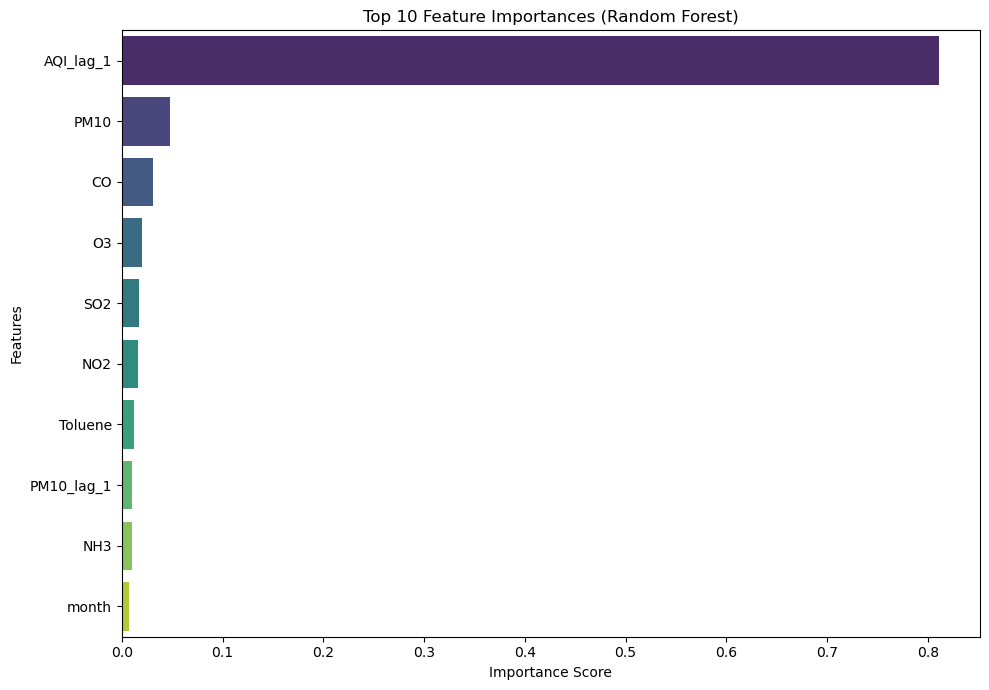

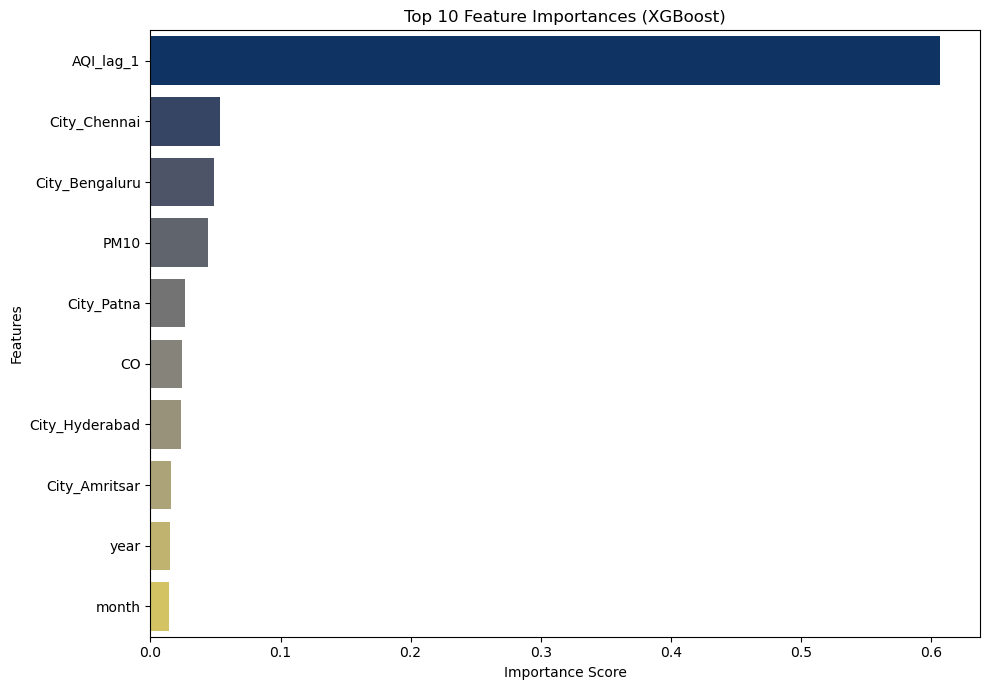

In [ ]:
# Feature Importance Analysis

# It's the process of "asking" your trained model, "Which features did you find most useful for making your predictions?"
# Tree-based models like Random Forest and XGBoost are excellent for this.
# They have a built-in property called .feature_importances_. 
# This property stores a score for every feature, showing how much it contributed to the model's accuracy.

# 1.Get and Plot Random Forest Importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_top10 = rf_importances.sort_values(ascending=False).head(10)

print("\n--- Top 10 Features for Random Forest ---")
print(rf_top10)

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x=rf_top10.values, y=rf_top10.index, hue=rf_top10.index, palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png')
print("Saved plot as 'random_forest_feature_importance.png'")

# 2. Get and Plot XGBoost Importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_top10 = xgb_importances.sort_values(ascending=False).head(10)

print("\n--- Top 10 Features for XGBoost ---")
print(xgb_top10)

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x=xgb_top10.values, y=xgb_top10.index, hue=xgb_top10.index, palette='cividis', legend=False)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png')
print("Saved plot as 'xgboost_feature_importance.png'")

print("\n--- All Done! ---")

In [ ]:
# The analysis shows that AQI is driven by three main factors:

# Short-term trends (represented by the 1-day lag features), which were the most powerful predictors.

# Seasonal patterns (represented by the month feature), which confirmed a strong yearly cycle.

# Current-day pollutant levels (like PM10 and CO), which provide the immediate measurements.